# Lastfm-2k

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

data = pd.read_csv("../../data/lastfm-2k/user_artists.dat",delimiter="\t")
data.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


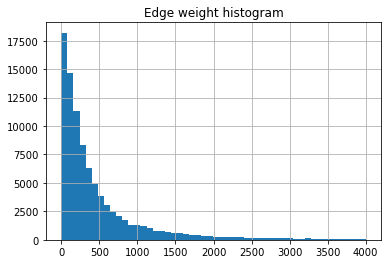

In [5]:
data["weight"][data.weight < 4000].hist(bins=50).set_title("Edge weight histogram")

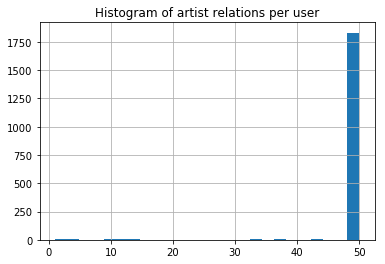

In [6]:
aux = data
aux["count"] = 1
artist_per_user = aux.groupby("userID").sum()["count"]
plot = artist_per_user.hist(bins=25)
plot.set_title("Histogram of artist relations per user")

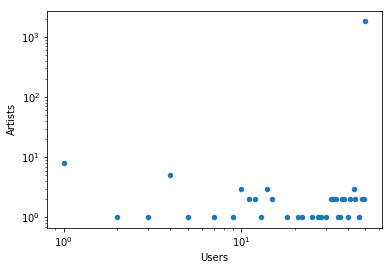

In [7]:
def to_loglog (series,x_label,y_label):
    aux_df = series.to_frame()
    aux_df.columns = ['count1']
    aux_df["count2"] = 1
    df = aux_df.groupby("count1").sum()["count2"].to_frame()
    df.reset_index(inplace=True)
    df.columns = [x_label,y_label]
    df.plot(kind='scatter',x=x_label,y=y_label,loglog=True)
    
to_loglog(artist_per_user,x_label='Users',y_label='Artists')

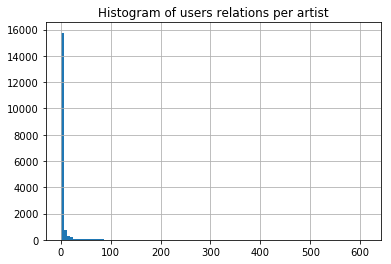

In [11]:
users_per_artist = data.groupby("artistID").count()["count"]
plot = users_per_artist.hist(bins=100)
plot.set_title("Histogram of users relations per artist")

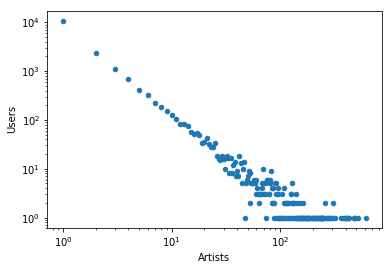

In [12]:
to_loglog(users_per_artist, x_label='Artists', y_label='Users')

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [25]:
n_users = data["userID"].unique().shape[0]
n_artists = data["artistID"].unique().shape[0]
#sparsity is real_edges/max_possible_edges
sparsity = data.shape[0]/(n_users*n_artists)
print("Sparsity is %.5f"%sparsity)

Sparsity is 0.00278
